In [1]:
import pandas as pd
import numpy as np
import os
from scipy import optimize
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df_constant_ccdi = pd.read_excel('master_df_constant_CCDi.xlsx')
df_constant_ccdiF = pd.read_excel('df_const_CCDiF.xlsx')
df_varTemp = pd.read_excel('master_df_varTemp.xlsx')

In [3]:
df_rates_K_ccdi = pd.read_excel('./df_rates_constant_CCDi.xlsx')
df_rates_K_ccdiF = pd.read_excel('./df_rates_constant_CCDiF.xlsx')
df_rates_varTemp = pd.read_excel('./df_rates_varTemp.xlsx')

In [4]:
colors = [  '#33BBEE', '#009988','#EE7733','#CC3311',]# '#BBBBBB'],
# Set your custom color palette

In [5]:
fnt=18

<Figure size 640x480 with 0 Axes>

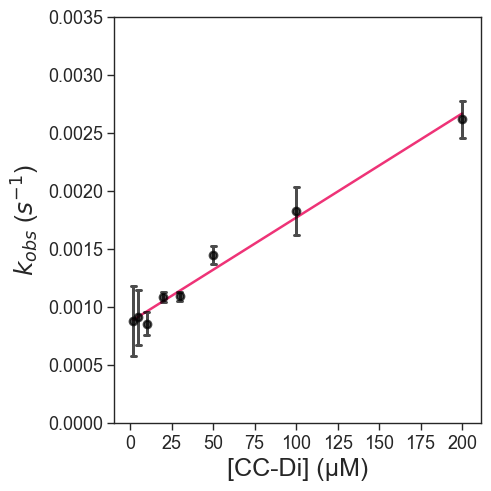

In [6]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_K_ccdiF,x='concDi',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=1,color='k',alpha=0.7)
sns.regplot(data=df_rates_K_ccdiF,x='concDi',y='rate',scatter=False,ci=None,
            color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)
plt.xlabel('[CC-Di] (μM)',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)

plt.tight_layout()
plt.savefig('Constant_unlabeled_CCDi.png',dpi=600)

In [7]:
plotdf = df_rates_K_ccdiF.copy()

In [8]:
plotdf = df_rates_K_ccdiF[df_rates_K_ccdiF['concDi']>5]

<Figure size 640x480 with 0 Axes>

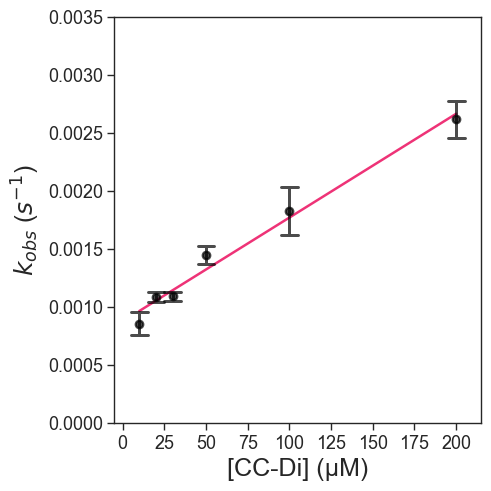

In [9]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=plotdf,x='concDi',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=1,color='k',alpha=0.7)
sns.regplot(data=plotdf,x='concDi',y='rate',scatter=False,ci=None,
            color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)
plt.xlabel('[CC-Di] (μM)',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)

plt.tight_layout()
plt.savefig('Constant_unlabeled_CCDi_rmv_5.png',dpi=600)

In [10]:
df_rates_K_ccdiF['sqrt([Di])']=np.sqrt(df_rates_K_ccdiF['concDi'])

<Figure size 640x480 with 0 Axes>

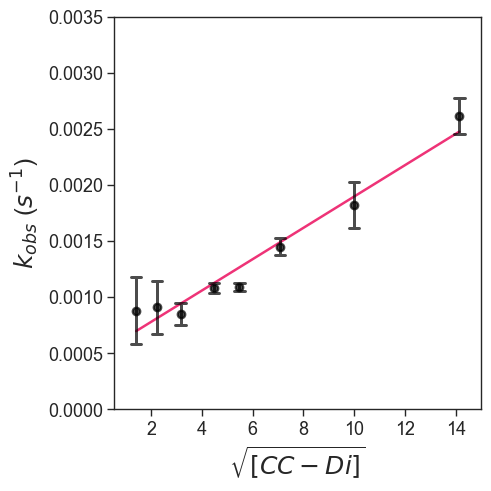

In [11]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_K_ccdiF,x='sqrt([Di])',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=0.5,color='k',alpha=0.7)
sns.regplot(data=df_rates_K_ccdiF,x='sqrt([Di])',y='rate',scatter=False,ci=None,color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)

plt.xlabel('$\sqrt{[CC-Di]}$',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Constant_sqrt_unlabeled_CCDi.png',transparent=True,dpi=600)

<Figure size 640x480 with 0 Axes>

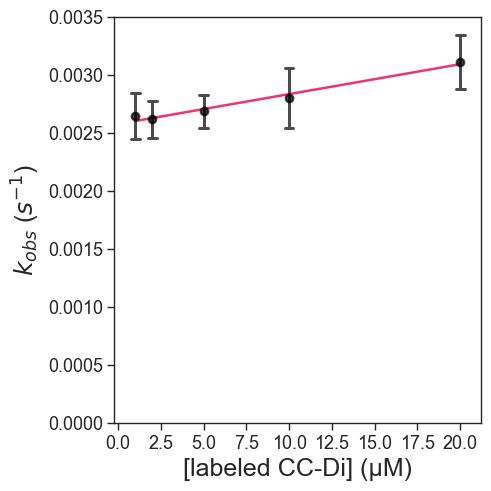

In [12]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_K_ccdi,x='concDiF',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=0.5,color='k',alpha=0.7)
sns.regplot(data=df_rates_K_ccdi,x='concDiF',y='rate',scatter=False,ci=None,color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)

plt.xlabel('[labeled CC-Di] (μM)',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Constant_labeled_CCDi.png',transparent=True,dpi=600)

In [13]:
np.sqrt

<ufunc 'sqrt'>

In [14]:
df_rates_K_ccdi['sqrt([DiF])']=np.sqrt(df_rates_K_ccdi['concDiF'])

<Figure size 640x480 with 0 Axes>

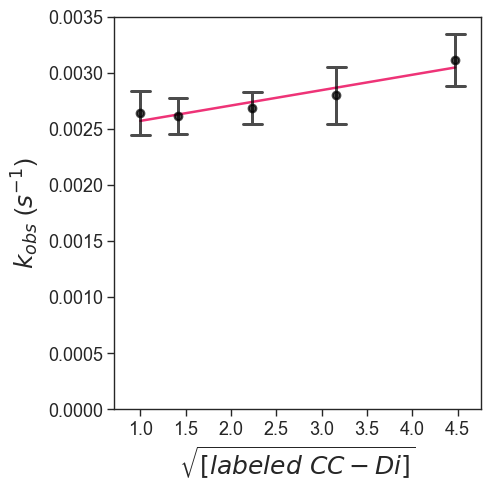

In [15]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_K_ccdi,x='sqrt([DiF])',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=0.5,color='k',alpha=0.7)
sns.regplot(data=df_rates_K_ccdi,x='sqrt([DiF])',y='rate',scatter=False,ci=None,color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)

plt.xlabel('$\sqrt{[labeled \ CC-Di]}$',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Constant_sqrt_labeled_CCDi.png',transparent=True,dpi=600)

In [16]:
df_rates_varTemp['1/T']=1/(df_rates_varTemp['temp']+273.15)
df_rates_varTemp['lnk']=np.log(df_rates_varTemp['rate'])


In [17]:
df_constant_ccdiF

,Unnamed: 0,t,F,temp,concDi,concDiF,rep,filepath,Fnrm,t0
0,0,56.5,255.193,25,200,2,2,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.000000,0.0
1,1,57.0,255.479,25,200,2,2,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.000959,0.5
2,2,57.5,255.845,25,200,2,2,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.002186,1.0
3,3,58.0,256.251,25,200,2,2,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.003547,1.5
4,4,58.5,256.640,25,200,2,2,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.004851,2.0
...,...,...,...,...,...,...,...,...,...,...
109918,109918,4995.0,297.223,25,2,2,1,./CCDi_data/Ratios/2_2/Di_2uM_Di_4GF_2uM_25deg...,0.910141,4905.0
109919,109919,4996.0,298.194,25,2,2,1,./CCDi_data/Ratios/2_2/Di_2uM_Di_4GF_2uM_25deg...,0.918058,4906.0
109920,109920,4997.0,296.184,25,2,2,1,./CCDi_data/Ratios/2_2/Di_2uM_Di_4GF_2uM_25deg...,0.901670,4907.0
109921,109921,4998.0,300.241,25,2,2,1,./CCDi_data/Ratios/2_2/Di_2uM_Di_4GF_2uM_25deg...,0.934748,4908.0


In [18]:
df_rates_varTemp['1/T*1000']=df_rates_varTemp['1/T']*1000

<Figure size 640x480 with 0 Axes>

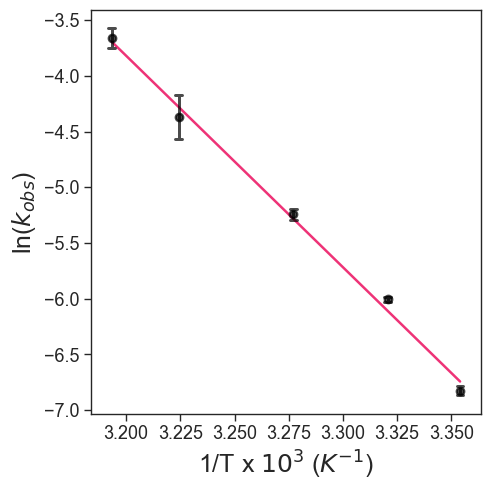

In [19]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_varTemp,x='1/T*1000',y='lnk',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=0.1,color='k',alpha=0.7)
sns.regplot(data=df_rates_varTemp,x='1/T*1000',y='lnk',scatter=False,ci=None,color='#EE3377')
plt.yticks(fontsize=fnt-5)
plt.xticks(fontsize=fnt-5)
#plt.ylim(0,0.0035)

plt.xlabel('1/T x $10^{{3}}$ ($K^{{-1}}$)',fontsize=fnt)
plt.ylabel('ln($k_{{obs}}$)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Arhennius.png',dpi=600)

In [20]:
df_constant_ccdiF['concDi'].value_counts()

concDi
50     17261
20     14862
30     14290
5      13545
10     12931
2      12794
200    12038
100    10733
1       1469
Name: count, dtype: int64

/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_85242/3232492962.py:15: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='se',hue='concDi',


<Figure size 640x480 with 0 Axes>

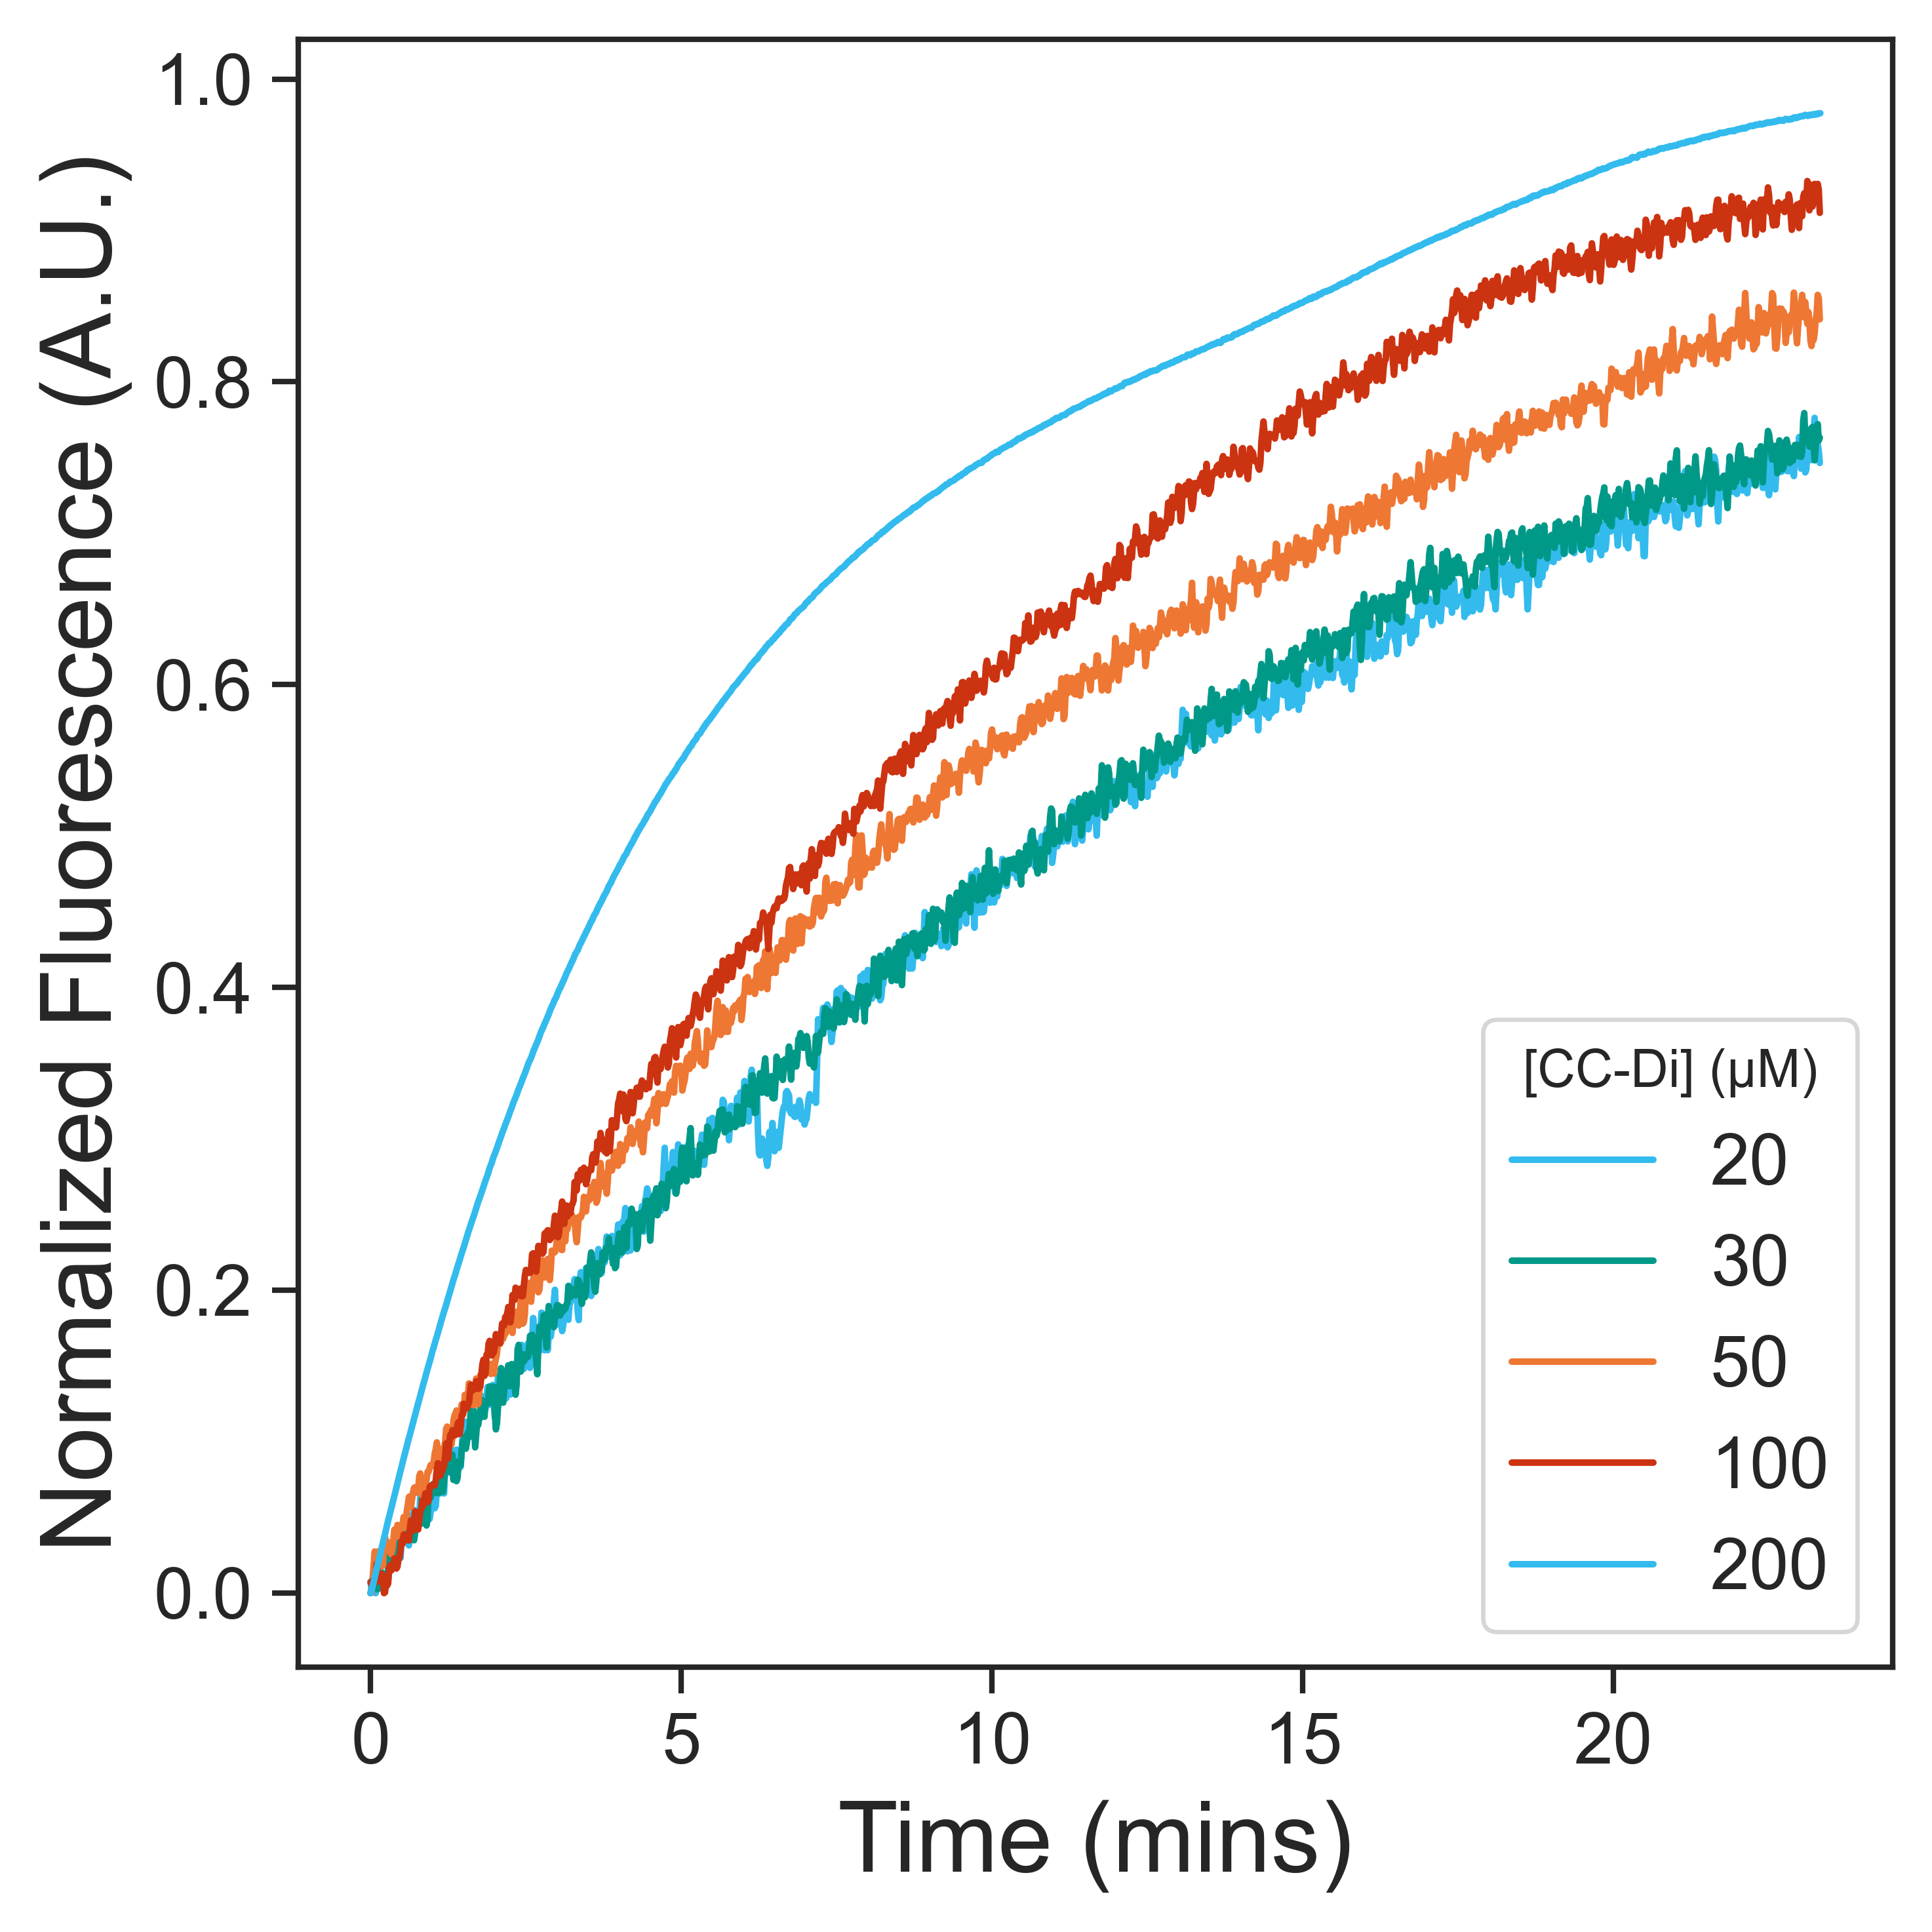

In [27]:
plot_df= df_constant_ccdiF[df_constant_ccdiF['concDi']>10]
plot_df=plot_df.sort_values('concDi')
plot_df['concDi']=plot_df['concDi'].astype(str)
plot_df=plot_df[plot_df['rep']==1]
plot_df=plot_df[plot_df['t0']<1400]
plot_df['tmin']=plot_df['t0']/60
plot_df['thr']=plot_df['tmin']/60
xx= 'tmin'
yy='Fnrm'

plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5),dpi=600)
sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='se',hue='concDi',
             palette=sns.color_palette(colors),alpha=1)
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)

#plt.ylim(0,0.0035)

plt.legend( title="[CC-Di] (μM)",fontsize=fnt-5,
                    loc='lower right',  fancybox=True)
plt.xlabel('Time (mins)',fontsize=fnt)
plt.ylabel('Normalized Fluorescence (A.U.)',fontsize=fnt,)
plt.tight_layout()
plt.savefig('Timecourse_concentration_1rep.png',dpi=600)

In [29]:
 '#EE7733',   '#EE3377',

('#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988')

In [30]:
colors = ['#0077BB', '#33BBEE', '#009988','#EE7733','#CC3311',]# '#BBBBBB'],
# Set your custom color palette

<Figure size 640x480 with 0 Axes>

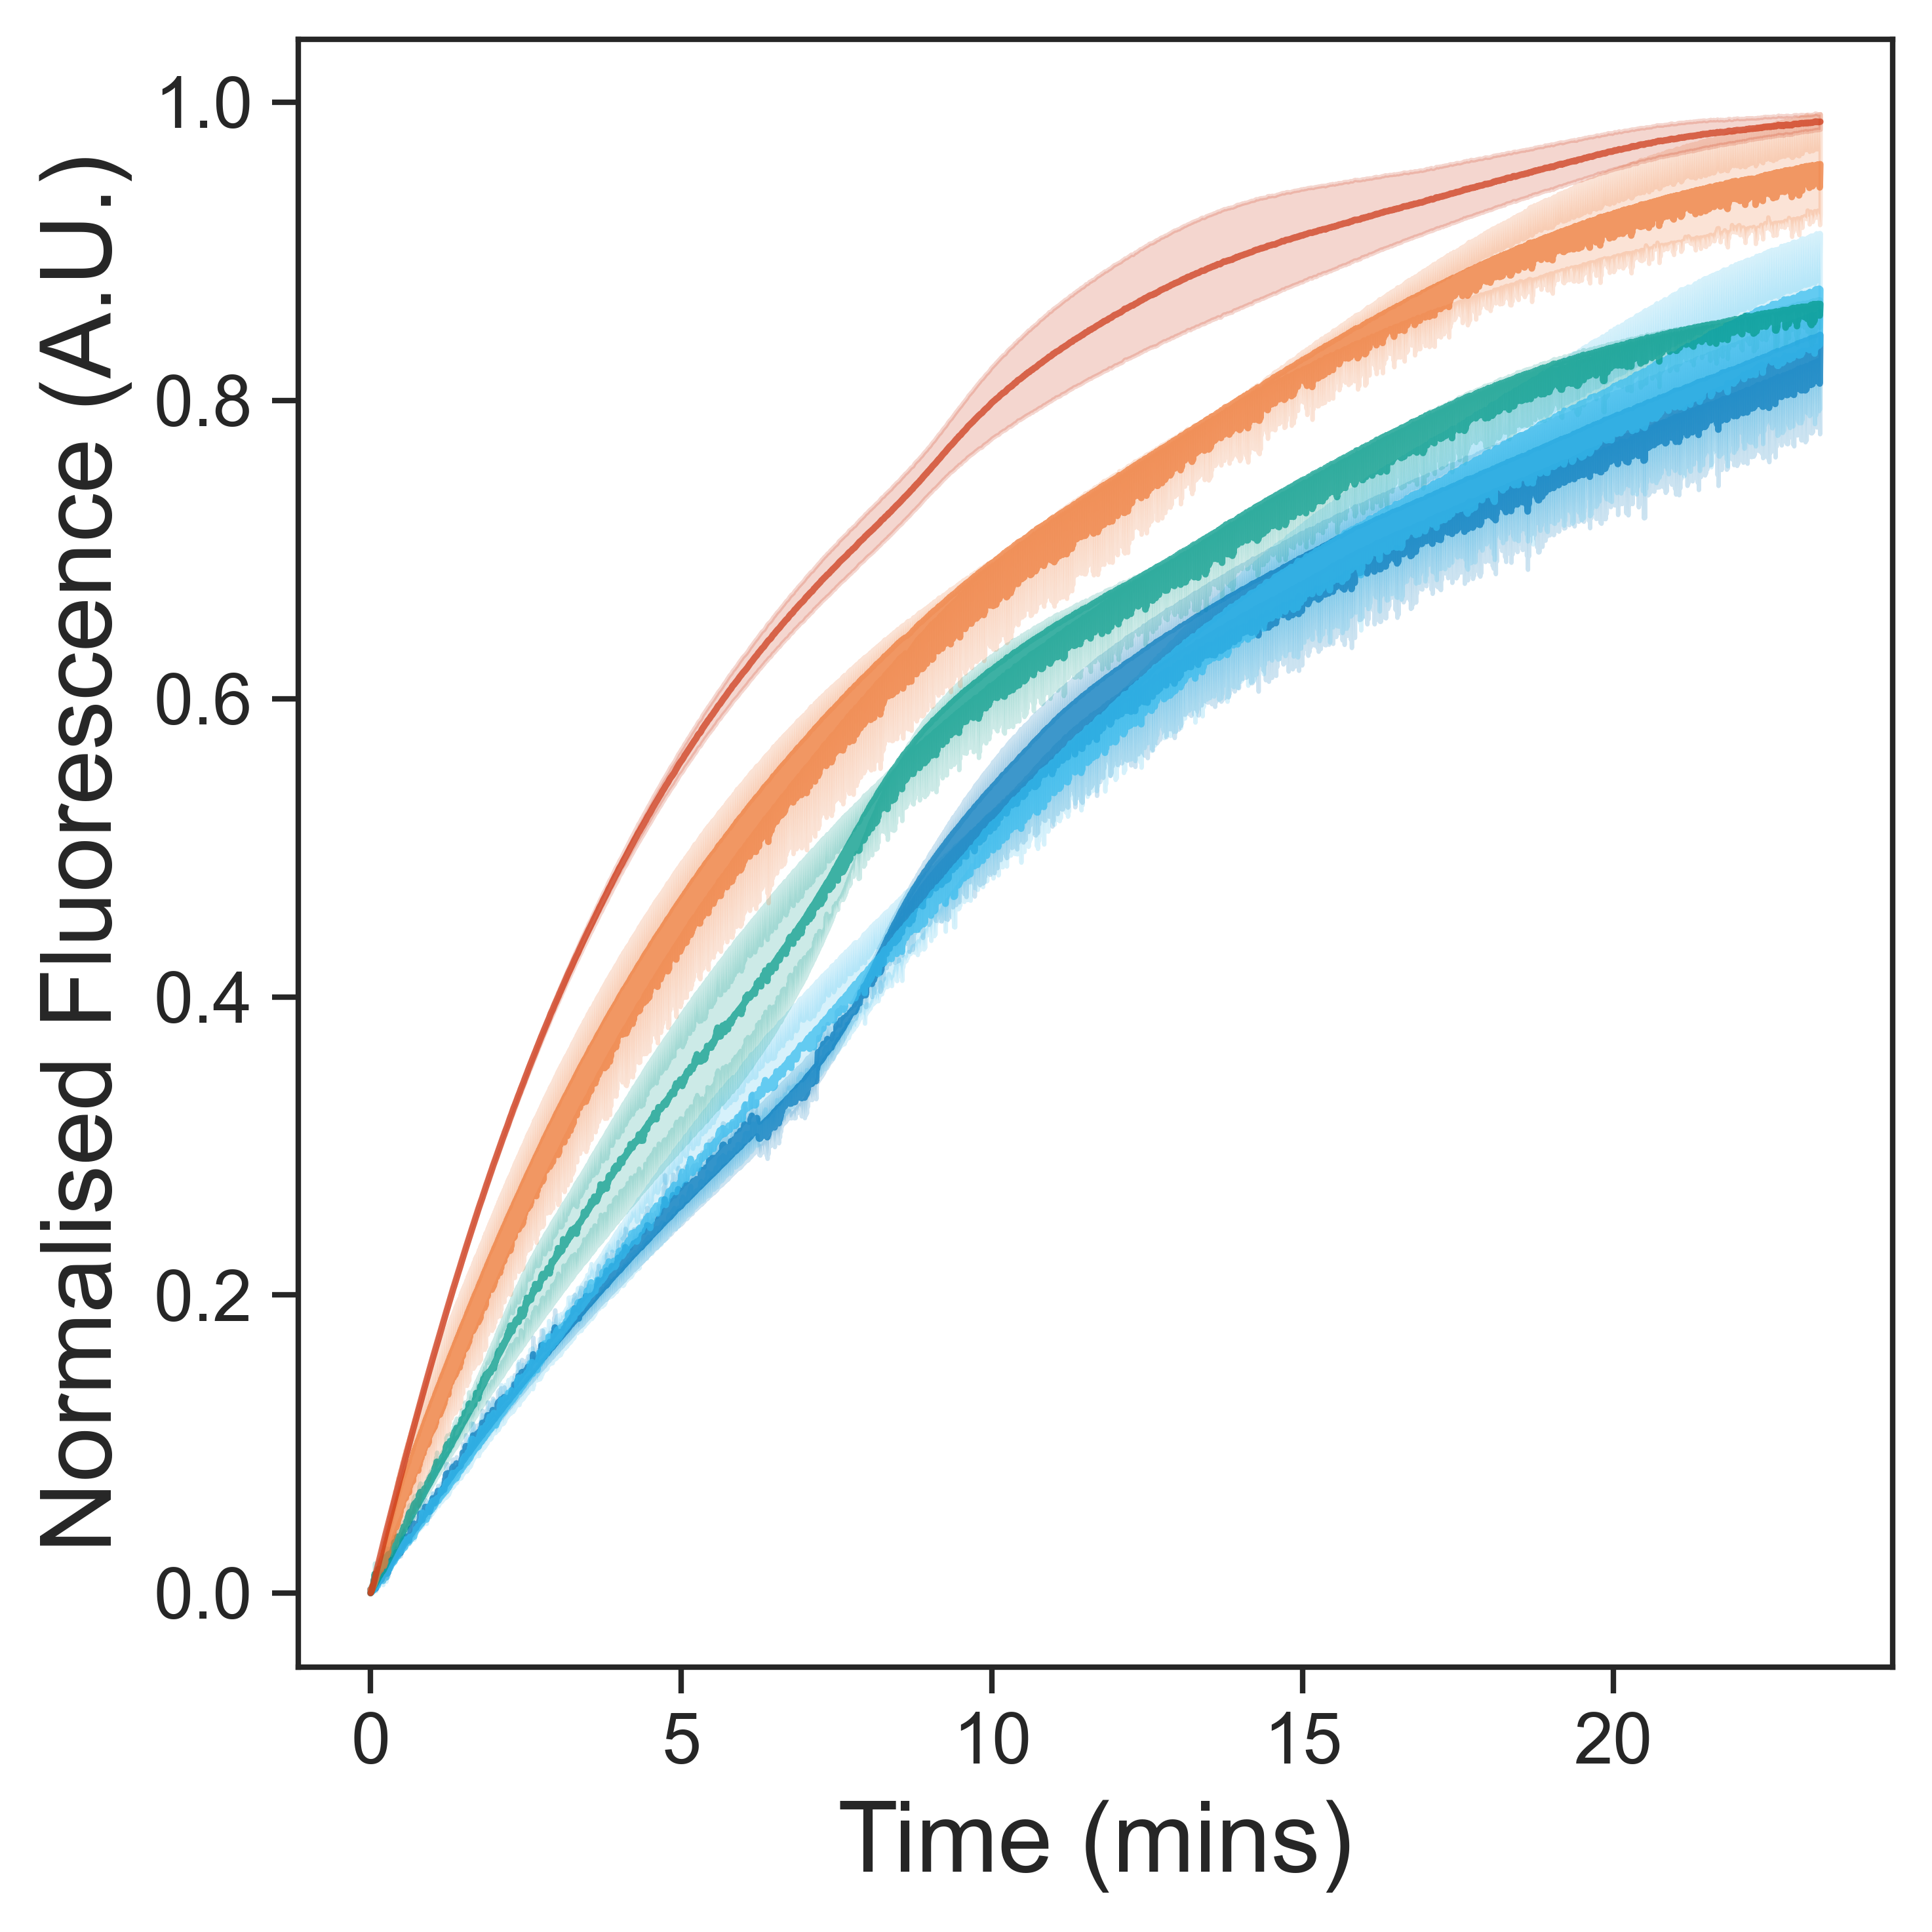

In [32]:
plot_df= df_constant_ccdiF[df_constant_ccdiF['concDi']>10]
plot_df=plot_df.sort_values('concDi')

plot_df['concDi']=plot_df['concDi'].astype(str)
plot_df=plot_df[plot_df['t0']<1400]
plot_df['tmin']=plot_df['t0']/60
plot_df['thr']=plot_df['tmin']/60
xx= 'tmin'
yy='Fnrm'


plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5),dpi=600)
sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='se',hue='concDi',
             palette=sns.color_palette(colors),alpha=0.7)
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
#plt.ylim(0,0.0035)
plt.legend('',frameon=False)
#plt.legend( title="[CC-Di] (μM)",fontsize=fnt-5,loc='lower right',  fancybox=True)
plt.xlabel('Time (mins)',fontsize=fnt)
plt.ylabel('Normalised Fluorescence (A.U.)',fontsize=fnt,)
plt.tight_layout()
plt.savefig('Timecourse_concentration_wo.png',dpi=600)

In [15]:
df_varTemp

,Unnamed: 0,t,F,temp,concDi,concDiF,rep,filepath,Fnrm,t0
0,0,40.0,291.562,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.000000,0.0
1,1,40.5,292.202,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.002790,0.5
2,2,41.0,292.779,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.005305,1.0
3,3,41.5,293.422,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.008107,1.5
4,4,42.0,294.026,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.010740,2.0
...,...,...,...,...,...,...,...,...,...,...
34338,34338,3248.0,463.092,25,20,2,2,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.999060,3193.0
34339,34339,3248.5,463.115,25,20,2,2,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.999152,3193.5
34340,34340,3249.0,463.249,25,20,2,2,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.999691,3194.0
34341,34341,3249.5,463.316,25,20,2,2,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.999960,3194.5


<Figure size 640x480 with 0 Axes>

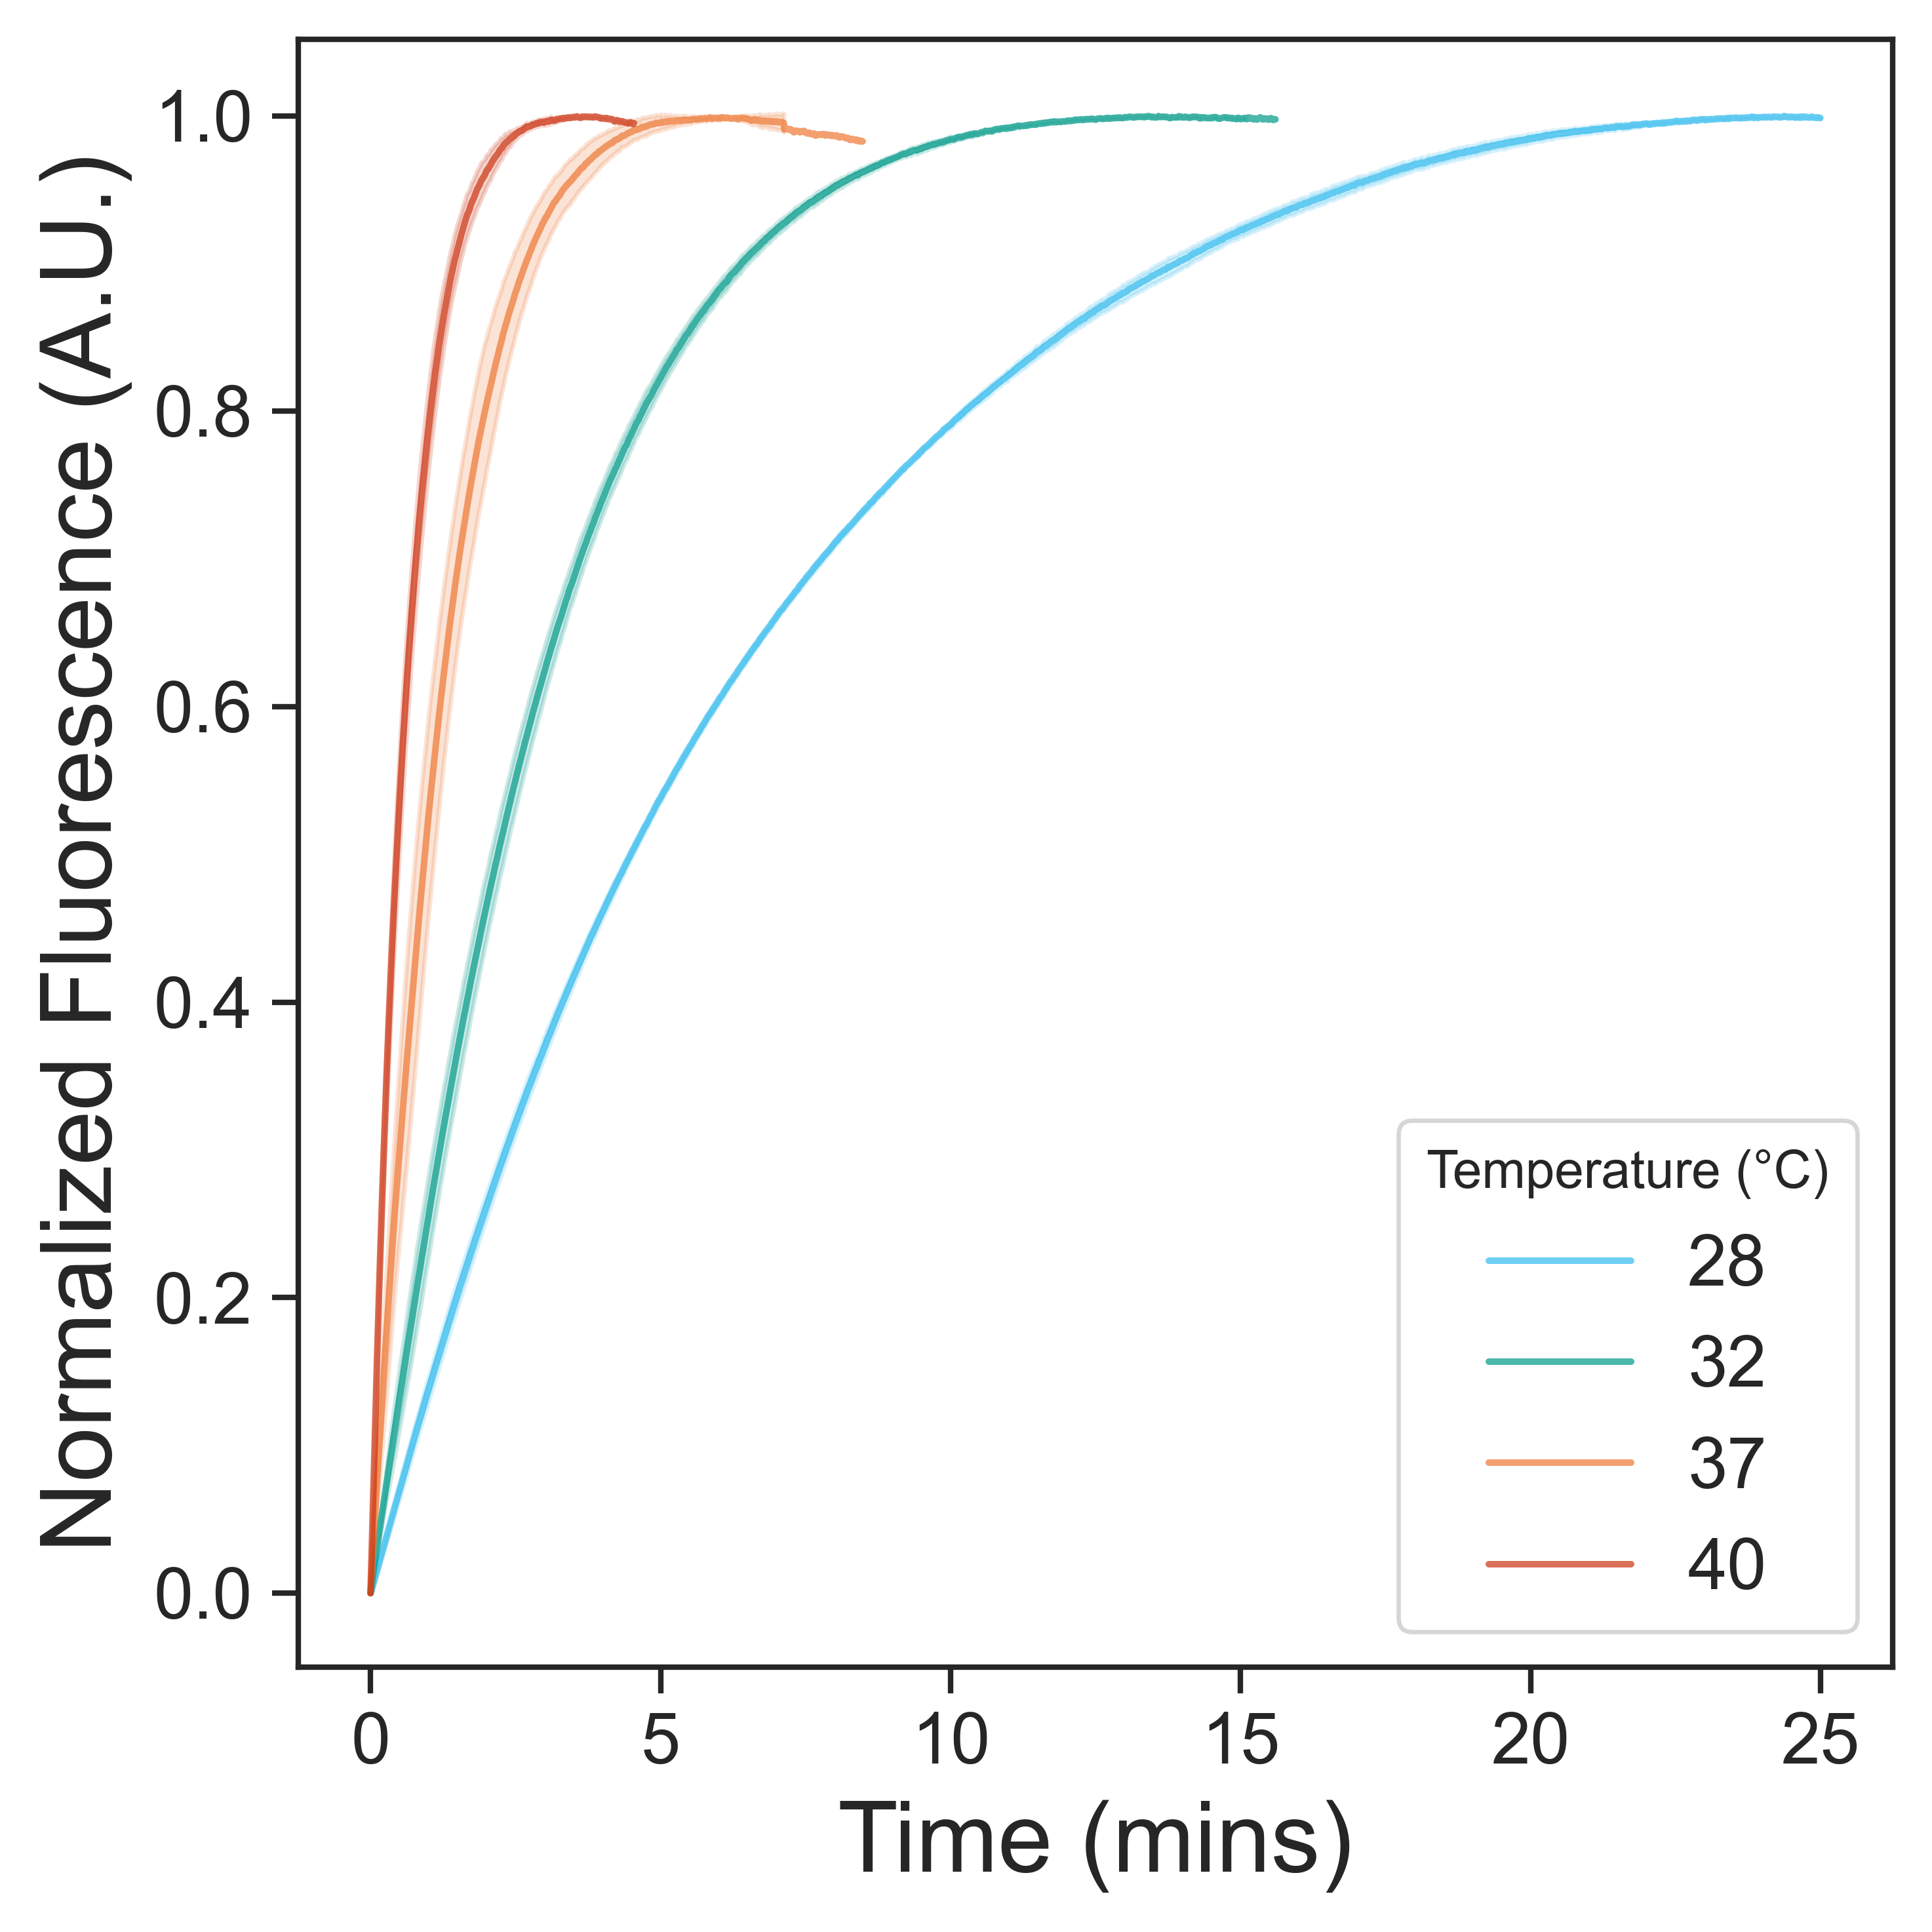

In [16]:
plot_df= df_varTemp.copy()
plot_df= plot_df[plot_df['temp']>25]
plot_df['temp']=plot_df['temp'].astype(str)
plot_df=plot_df.sort_values('temp')

plot_df=plot_df[plot_df['t0']<1500]
plot_df['tmin']=plot_df['t0']/60
plot_df['thr']=plot_df['tmin']/60
xx= 'tmin'
yy='Fnrm'
font_size=12

plt.clf()
sns.set_context('paper')
sns.set_style('ticks')

plt.figure(0,(5,5),dpi=600)
sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='sd',hue='temp',
             palette=sns.color_palette(colors),alpha=0.7)
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
#plt.ylim(0,0.0035)

plt.legend( title="Temperature (°C)",fontsize=fnt-5,
                    loc='lower right', fancybox=True)
plt.xlabel('Time (mins)',fontsize=fnt)
plt.ylabel('Normalized Fluorescence (A.U.)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Timecourse_temperature.png',dpi=600)

In [17]:
df_rates_varTemp

,Unnamed: 0,temp,concDi,concDiF,rep,filepath,rate,halflife,r2,rmv from start,rmv from end,figpath,concDiM,1/T,lnk,1/T*1000
0,0,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.005515,125.695269,0.999498,80,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003277,-5.200373,3.277077
1,1,32,20,2,2,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.004997,138.705524,0.996341,80,-400,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003277,-5.298866,3.277077
2,2,32,20,2,3,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.005354,129.466237,0.998558,80,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003277,-5.229933,3.277077
3,3,40,20,2,3,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.026496,26.160296,0.999728,75,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003193,-3.630756,3.193358
4,4,40,20,2,2,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.023307,29.740338,0.999562,53,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003193,-3.759017,3.193358
5,5,40,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.027609,25.106247,0.999786,65,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003193,-3.589630,3.193358
6,6,37,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.015793,43.890690,0.998600,75,-500,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003224,-4.148215,3.224246
7,7,37,20,2,2,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.010989,63.078566,0.995970,75,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003224,-4.510894,3.224246
8,8,37,20,2,3,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.011694,59.271615,0.996648,60,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003224,-4.448643,3.224246
9,9,28,20,2,2,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.002400,288.763553,0.999830,60,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003321,-6.032121,3.320604


In [18]:
df_rates_varTemp.sort_values('halflife')

,Unnamed: 0,temp,concDi,concDiF,rep,filepath,rate,halflife,r2,rmv from start,rmv from end,figpath,concDiM,1/T,lnk,1/T*1000
5,5,40,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.027609,25.106247,0.999786,65,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003193,-3.589630,3.193358
3,3,40,20,2,3,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.026496,26.160296,0.999728,75,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003193,-3.630756,3.193358
4,4,40,20,2,2,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.023307,29.740338,0.999562,53,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003193,-3.759017,3.193358
6,6,37,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.015793,43.890690,0.998600,75,-500,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003224,-4.148215,3.224246
8,8,37,20,2,3,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.011694,59.271615,0.996648,60,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003224,-4.448643,3.224246
7,7,37,20,2,2,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.010989,63.078566,0.995970,75,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003224,-4.510894,3.224246
0,0,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.005515,125.695269,0.999498,80,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003277,-5.200373,3.277077
2,2,32,20,2,3,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.005354,129.466237,0.998558,80,-1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003277,-5.229933,3.277077
1,1,32,20,2,2,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.004997,138.705524,0.996341,80,-400,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003277,-5.298866,3.277077
10,10,28,20,2,3,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.002511,276.094576,0.999146,180,-200,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,NaN,0.003321,-5.987256,3.320604


In [19]:
600/60

10.0

In [20]:
df_rates_K_ccdi.sort_values('halflife')

,Unnamed: 0,temp,concDi,concDiF,rep,filepath,rate,halflife,r2,rmv from start,rmv from end,figpath
14,14,25,200,20,1,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.003290,210.700178,0.997526,105,-1,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
13,13,25,200,20,3,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.003201,216.569902,0.999974,70,-150,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
11,11,25,200,10,2,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.002980,232.574690,0.999943,88,-1,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
10,10,25,200,10,3,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.002911,238.089544,0.999927,80,-1,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
12,12,25,200,20,2,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.002848,243.404706,0.987246,75,-1,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
1,1,25,200,1,3,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.002838,244.207218,0.999934,100,-100,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
5,5,25,200,5,3,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.002768,250.457331,0.999839,70,-1,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
4,4,25,200,5,2,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.002766,250.623810,0.999655,88,-700,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
7,7,25,200,2,3,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.002745,252.506268,0.999489,56,-1,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...
6,6,25,200,2,2,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...,0.002663,260.316502,0.993643,113,-500,./CCDi_data/Ratios_const_unlabelled/Di_200uM_D...


In [21]:
df_rates_K_ccdiF

,Unnamed: 0,temp,concDi,concDiF,rep,filepath,rate,halflife,r2,rmv from start,rmv from end,figpath,concDiM
0,0,25,200,2,2,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.002663,260.316502,0.993643,113,-500,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.000200
1,1,25,200,2,3,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.002745,252.506268,0.999489,56,-1,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.000200
2,2,25,200,2,1,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.002442,283.864497,0.993172,85,-4500,./CCDi_data/Ratios/200_2/Di_200uM_Di_4GF_2uM_2...,0.000200
3,3,25,100,2,1,./CCDi_data/Ratios/100_2/Di_100uM_Di_4GF_2uM_2...,0.001586,437.127623,0.996571,155,-1,./CCDi_data/Ratios/100_2/Di_100uM_Di_4GF_2uM_2...,0.000100
4,4,25,100,2,3,./CCDi_data/Ratios/100_2/Di_100uM_Di_4GF_2uM_2...,0.001917,361.592422,0.999678,154,-1,./CCDi_data/Ratios/100_2/Di_100uM_Di_4GF_2uM_2...,0.000100
5,5,25,100,2,2,./CCDi_data/Ratios/100_2/Di_100uM_Di_4GF_2uM_2...,0.001968,352.227880,0.989457,220,-1,./CCDi_data/Ratios/100_2/Di_100uM_Di_4GF_2uM_2...,0.000100
6,6,25,30,2,2,./CCDi_data/Ratios/30_2/Di_30uM_Di_4GF_2uM_25d...,0.001050,660.016444,0.996162,80,-1,./CCDi_data/Ratios/30_2/Di_30uM_Di_4GF_2uM_25d...,0.000030
7,7,25,30,2,3,./CCDi_data/Ratios/30_2/Di_30uM_Di_4GF_2uM_25d...,0.001101,629.666376,0.996186,110,-1,./CCDi_data/Ratios/30_2/Di_30uM_Di_4GF_2uM_25d...,0.000030
8,8,25,30,2,1,./CCDi_data/Ratios/30_2/Di_30uM_Di_4GF_2uM_25d...,0.001120,619.135954,0.997861,90,-1,./CCDi_data/Ratios/30_2/Di_30uM_Di_4GF_2uM_25d...,0.000030
9,9,25,20,2,1,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.001044,663.797951,0.998184,90,-1,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.000020


In [22]:
(1206.543311+ 773.951593+589.252002)/3/60

14.276371699999999

In [41]:
df_rates_K_ccdi.to_excel('./df_rates_constant_CCDi_2.xlsx')
df_rates_K_ccdiF.to_excel('./df_rates_constant_CCDiF_2.xlsx')